In [1]:
# Numerical library
import numpy as np

# Data manipulation
import pandas as pd
#from patsy import dmatrix

# Ploting
import matplotlib.pyplot as plt
import matplotlib
# Survival analysis
import lifelines

from IPython.display import *



In [2]:
%matplotlib inline

In [3]:
clinical = pd.read_csv('male_sum_sur.csv')



In [4]:
clinical.head()

,m,status,survival_days,gender,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,...,ENSG00000281880,ENSG00000281883,ENSG00000281887,ENSG00000281896,ENSG00000281903,ENSG00000281904,ENSG00000281909,ENSG00000281910,ENSG00000281912,ENSG00000281920
0,1,alive,1776,male,-0.639738,-0.415185,-0.771855,-1.190351,-0.503066,-0.561893,...,0.779592,-0.829817,-0.157804,-0.850672,0.494791,-0.306227,-0.336862,-0.174654,-0.708641,-0.605663
1,8,alive,426,male,-0.737496,-0.474688,-0.846680,-0.961109,-0.482099,-0.586074,...,-0.261894,-0.829817,-0.157804,-0.460162,-0.551202,-0.306227,-0.336862,-0.174654,-0.746025,1.994379
2,11,alive,1915,male,-0.738865,-0.454854,-0.487517,-0.205159,-0.702253,-0.626377,...,-0.261894,0.149639,-0.157804,-0.340005,0.494791,-0.306227,-0.336862,-0.174654,0.674537,-0.605663
3,12,alive,821,male,-1.005941,-0.484605,-1.106268,-1.029336,-1.030737,-0.123940,...,-0.261894,-0.829817,-0.157804,-0.760554,-0.899867,-0.306227,-0.336862,-0.174654,-0.446959,-0.605663
4,18,alive,518,male,0.892922,-0.256511,0.391398,0.670871,0.031594,-0.661306,...,-0.261894,0.639367,-0.157804,0.020465,0.262348,-0.306227,-0.336862,0.042552,0.487621,-0.605663


In [5]:
clinical['status'] = (clinical['status'] == 'dead')*1

In [6]:
from lifelines import KaplanMeierFitter

In [7]:
kmf=KaplanMeierFitter()
kmf.fit(clinical['survival_days'], clinical['status'])

<lifelines.KaplanMeierFitter: fitted with 341 observations, 281 censored>

Populating the interactive namespace from numpy and matplotlib


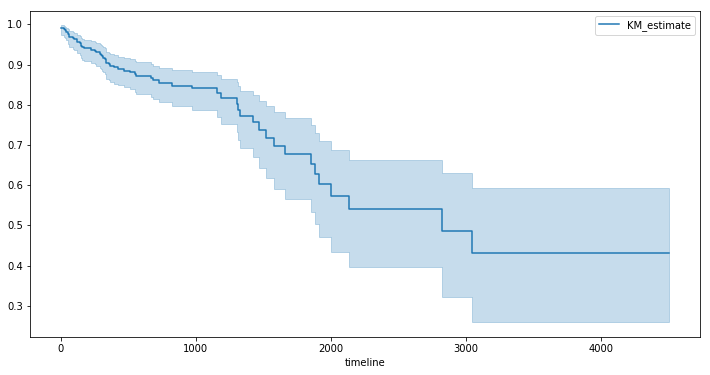

In [8]:
%pylab inline
figsize(12,6)
kmf.plot()

(0, 2)


IndexError: list index out of range

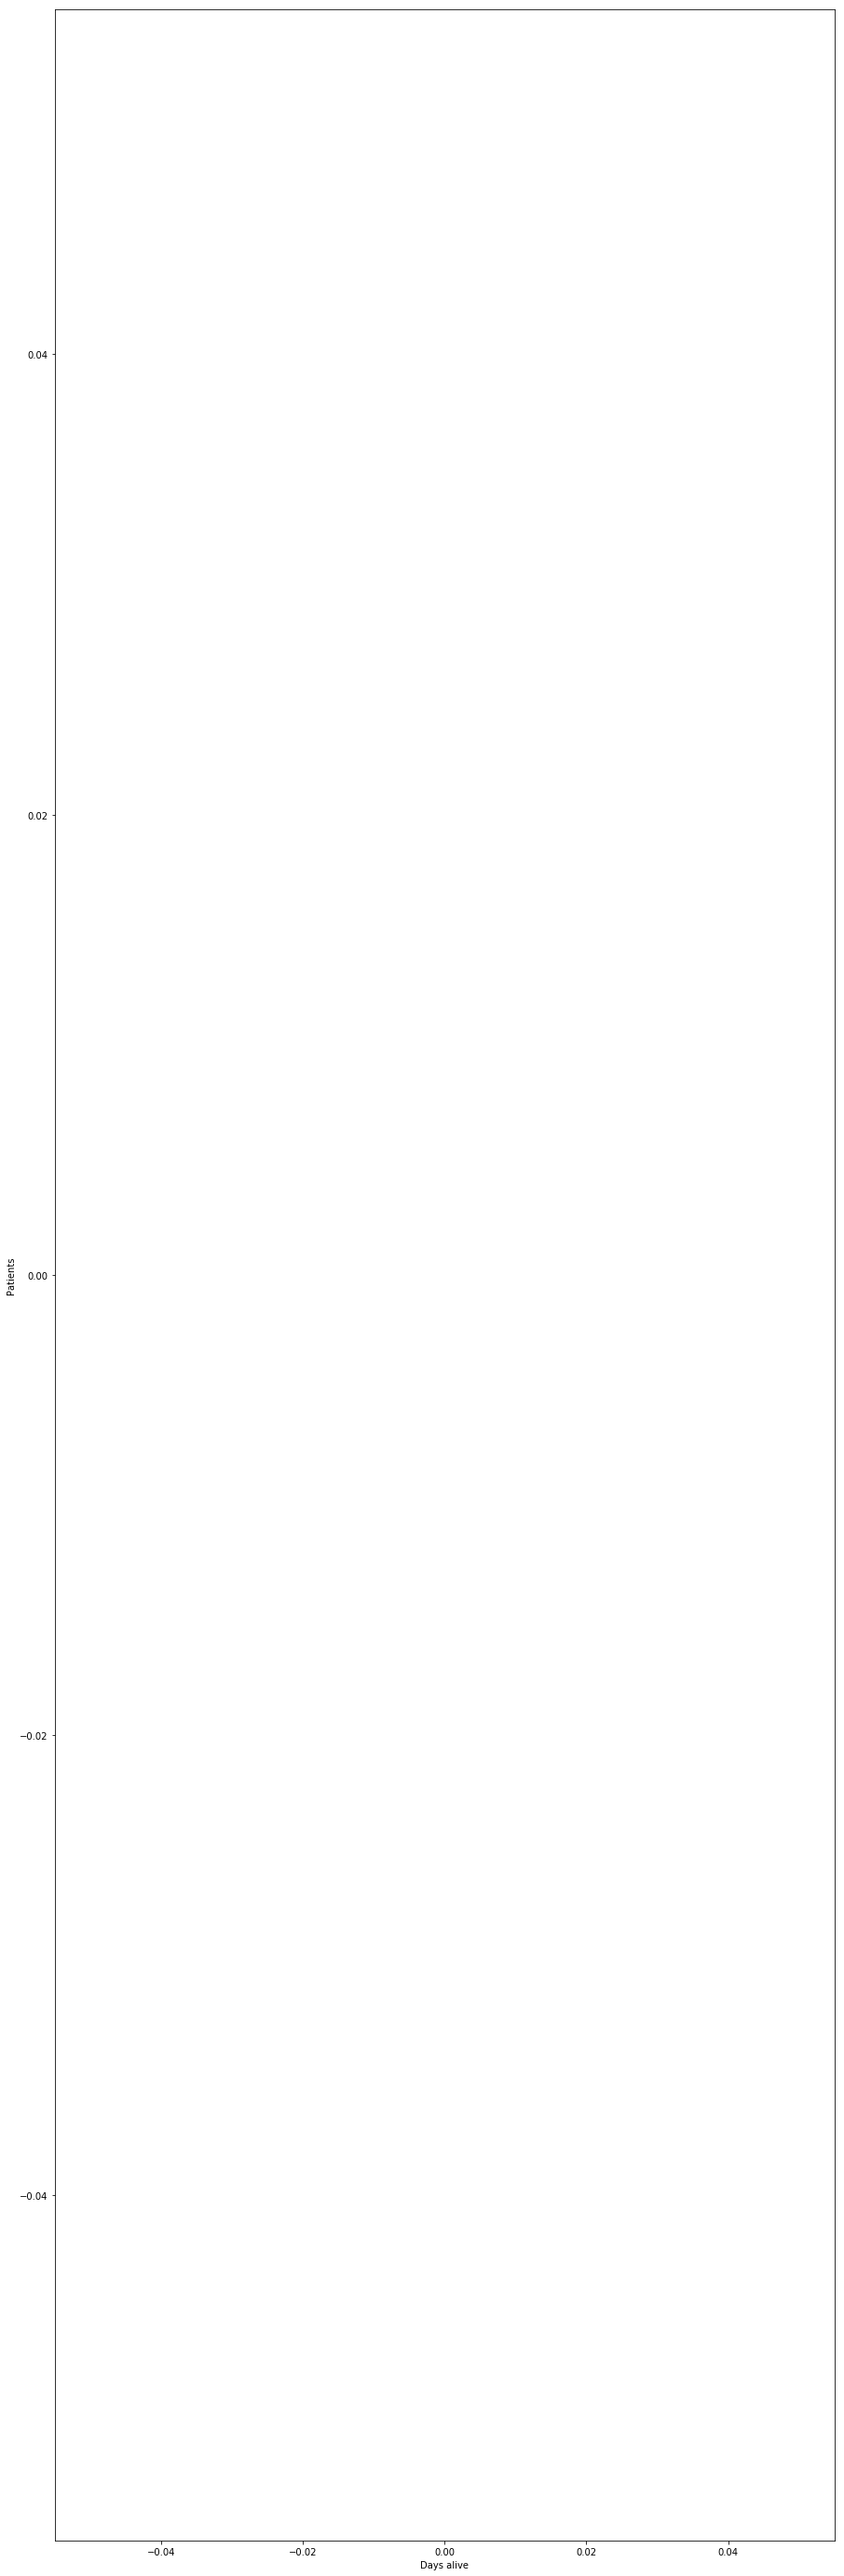

In [15]:
matplotlib.rcParams['figure.figsize'] = [15, 50]

data_sorted = clinical[['survival_days','status']].sort_values(by = 'survival_days').dropna().reset_index(drop=True)
print(data_sorted.shape)
status_slice = data_sorted['status'] == 1

fig, ax = plt.subplots()

ax.barh(data_sorted.loc[~status_slice].index, data_sorted.loc[~status_slice,'survival_days'], height = 1, color = 'b')
ax.barh(data_sorted.loc[status_slice].index, data_sorted.loc[status_slice,'survival_days'], height = 1, color = 'r')

ax.set_xlabel('Days alive')
ax.set_ylabel('Patients')
ax.legend(['Alive', 'Dead'])
ax.xaxis.tick_top()
ax.grid()

In [16]:
kmf = lifelines.KaplanMeierFitter()
kmf_naive = lifelines.KaplanMeierFitter()

clinical = clinical.dropna()

kmf.fit(clinical['survival_days'], clinical['status'])
kmf_naive.fit(clinical['survival_days'], np.repeat(1, len(clinical['survival_days'])))

matplotlib.rcParams['figure.figsize'] = [10, 10]
ax = kmf.plot(ci_show=False)
kmf_naive.plot(ax=ax, ci_show=False)
plt.legend(['Kaplan-Meier estimate','Naive estimate'])
plt.xlabel('Days')
plt.ylabel('$S(t)$')
plt.ylim([0,1])

ValueError: Values must be numeric: no strings, datetimes, objects, etc.

In [17]:

### Define groups here
group_1 = clinical[clinical['outcome'] == 1]
group_2 = clinical[clinical['outcome'] == 0]
###

kmf.fit(group_1['survival_days'], group_1['status'], label='cancer')
ax = kmf.plot(ci_show=False)

kmf.fit(group_2['survival_days'], group_2['status'], label='non-cancer')
kmf.plot(ax=ax, ci_show=False)

plt.title('survival rate')

ValueError: Values must be numeric: no strings, datetimes, objects, etc.

In [9]:
data = clinical
data.head()


,m,status,survival_days,gender,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,...,ENSG00000281880,ENSG00000281883,ENSG00000281887,ENSG00000281896,ENSG00000281903,ENSG00000281904,ENSG00000281909,ENSG00000281910,ENSG00000281912,ENSG00000281920
0,1,0,1776,male,-0.639738,-0.415185,-0.771855,-1.190351,-0.503066,-0.561893,...,0.779592,-0.829817,-0.157804,-0.850672,0.494791,-0.306227,-0.336862,-0.174654,-0.708641,-0.605663
1,8,0,426,male,-0.737496,-0.474688,-0.846680,-0.961109,-0.482099,-0.586074,...,-0.261894,-0.829817,-0.157804,-0.460162,-0.551202,-0.306227,-0.336862,-0.174654,-0.746025,1.994379
2,11,0,1915,male,-0.738865,-0.454854,-0.487517,-0.205159,-0.702253,-0.626377,...,-0.261894,0.149639,-0.157804,-0.340005,0.494791,-0.306227,-0.336862,-0.174654,0.674537,-0.605663
3,12,0,821,male,-1.005941,-0.484605,-1.106268,-1.029336,-1.030737,-0.123940,...,-0.261894,-0.829817,-0.157804,-0.760554,-0.899867,-0.306227,-0.336862,-0.174654,-0.446959,-0.605663
4,18,0,518,male,0.892922,-0.256511,0.391398,0.670871,0.031594,-0.661306,...,-0.261894,0.639367,-0.157804,0.020465,0.262348,-0.306227,-0.336862,0.042552,0.487621,-0.605663


,test_statistic,p
0,1.886023,0.169651


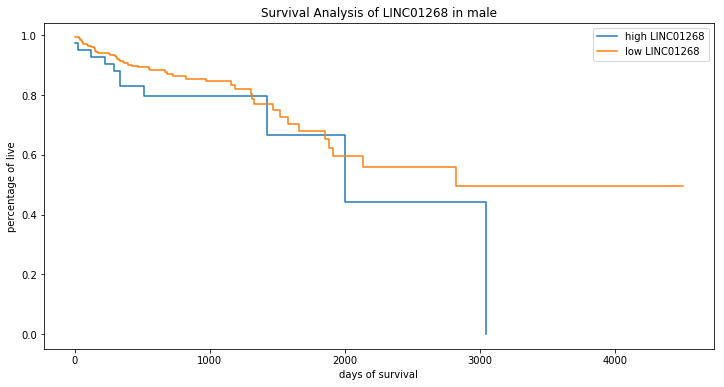

In [34]:


### Define groups here
treshold =0

group_1 = data.loc[data['ENSG00000261208'] > treshold]
group_2 = data.loc[data['ENSG00000261208'] <= treshold]
###
###

kmf.fit(group_1['survival_days'], group_1['status'], label='high LINC01268')
ax = kmf.plot(ci_show=False)

kmf.fit(group_2['survival_days'], group_2['status'], label='low LINC01268')
kmf.plot(ax=ax, ci_show=False)

plt.title('Survival Analysis of LINC01268 in male')
plt.xlabel('days of survival')
plt.ylabel('percentage of live')

from lifelines.statistics import logrank_test

test = logrank_test(group_1['survival_days'], group_2['survival_days'], event_observed_A=group_1['status'], event_observed_B=group_2['status'])
test.summary

In [5]:

clinical = pd.read_csv('brca_tcga_pub_clinical_data.tsv', sep='\t')

with pd.option_context('display.max_columns', None):
    display(clinical)

,Study ID,Patient ID,Sample ID,Diagnosis Age,Cancer Type,Cancer Type Detailed,CN Cluster,Converted Stage,ER Status,Fraction Genome Altered,HER2 Status,Integrated Clusters (no exp),Integrated Clusters (unsup exp),Integrated Clusters (with PAM50),Metastasis,Metastasis-Coded,Methylation Cluster,MIRNA Cluster,Mutation Count,Node,Node-Coded,Oncotree Code,Overall Survival (Months),Overall Survival Status,PAM50 subtype,PR Status,RPPA Cluster,Number of Samples Per Patient,Sex,SigClust Intrinsic mRNA,SigClust Unsupervised mRNA,Survival Data Form,Tumor Stage,Tumor--T1 Coded
0,brca_tcga_pub,TCGA-A1-A0SB,TCGA-A1-A0SB-01,70.0,Breast Cancer,Invasive Breast Carcinoma,1.0,Stage I,Positive,0.000802,Negative,NaN,NaN,NaN,M0,Negative,5.0,3.0,NaN,N0,Negative,BRCA,8.51,LIVING,NaN,Negative,NaN,1,Female,NaN,NaN,enrollment,T1,T1
1,brca_tcga_pub,TCGA-A1-A0SD,TCGA-A1-A0SD-01,59.0,Breast Cancer,Invasive Breast Carcinoma,2.0,Stage IIA,Positive,0.247381,Negative,NaN,NaN,NaN,M0,Negative,1.0,6.0,34.0,N0,Negative,BRCA,14.36,LIVING,Luminal A,Positive,NaN,1,Female,-9.0,-3.0,enrollment,T2,T_Other
2,brca_tcga_pub,TCGA-A1-A0SE,TCGA-A1-A0SE-01,56.0,Breast Cancer,Invasive Breast Carcinoma,2.0,Stage I,Positive,0.213374,Negative,NaN,NaN,NaN,M0,Negative,1.0,6.0,15.0,N0,Negative,BRCA,43.37,LIVING,Luminal A,Positive,NaN,1,Female,-5.0,-7.0,enrollment,T1,T1
3,brca_tcga_pub,TCGA-A1-A0SF,TCGA-A1-A0SF-01,54.0,Breast Cancer,Invasive Breast Carcinoma,3.0,Stage IIA,Positive,0.201518,Negative,NaN,NaN,NaN,M0,Negative,4.0,6.0,NaN,N0,Negative,BRCA,48.07,LIVING,NaN,Positive,NaN,1,Female,NaN,NaN,enrollment,T2,T_Other
4,brca_tcga_pub,TCGA-A1-A0SG,TCGA-A1-A0SG-01,61.0,Breast Cancer,Invasive Breast Carcinoma,4.0,Stage IIB,Positive,0.096928,Negative,NaN,NaN,NaN,M0,Negative,2.0,5.0,NaN,N1,Positive,BRCA,14.23,LIVING,NaN,Positive,NaN,1,Female,NaN,NaN,enrollment,T2,T_Other
5,brca_tcga_pub,TCGA-A1-A0SH,TCGA-A1-A0SH-01,39.0,Breast Cancer,Invasive Breast Carcinoma,5.0,Stage IIA,Negative,0.178887,Negative,1.0,1.0,1.0,M0,Negative,2.0,4.0,75.0,N0,Negative,BRCA,47.21,LIVING,Luminal A,Positive,Her2,1,Female,-5.0,-7.0,enrollment,T2,T_Other
6,brca_tcga_pub,TCGA-A1-A0SI,TCGA-A1-A0SI-01,52.0,Breast Cancer,Invasive Breast Carcinoma,3.0,Stage IIB,Positive,0.331275,Negative,NaN,NaN,NaN,M0,Negative,5.0,7.0,NaN,N1,Positive,BRCA,20.83,LIVING,NaN,Positive,NaN,1,Female,NaN,NaN,enrollment,T2,T_Other
7,brca_tcga_pub,TCGA-A1-A0SJ,TCGA-A1-A0SJ-01,39.0,Breast Cancer,Invasive Breast Carcinoma,3.0,Stage IIIA,Positive,0.460025,Negative,1.0,3.0,3.0,M0,Negative,4.0,4.0,31.0,N1,Positive,BRCA,14.00,LIVING,Luminal A,Positive,ReacI,1,Female,-3.0,-3.0,enrollment,T3,T_Other
8,brca_tcga_pub,TCGA-A1-A0SK,TCGA-A1-A0SK-01,54.0,Breast Cancer,Invasive Breast Carcinoma,1.0,Stage IIA,Negative,0.416336,Negative,2.0,2.0,2.0,M0,Negative,5.0,5.0,49.0,N0,Negative,BRCA,31.77,DECEASED,Basal-like,Negative,Basal,1,Female,-13.0,-6.0,followup,T2,T_Other
9,brca_tcga_pub,TCGA-A1-A0SM,TCGA-A1-A0SM-01,77.0,Breast Cancer,Invasive Breast Carcinoma,2.0,Stage IIA,Positive,0.180750,Positive,NaN,NaN,NaN,M0,Negative,4.0,4.0,24.0,N0,Negative,BRCA,7.95,LIVING,Luminal B,Negative,NaN,1,Male,-1.0,-3.0,enrollment,T2,T_Other


In [6]:

clinical['Time'] = clinical['Overall Survival (Months)']*30
clinical['Event'] = (clinical['Overall Survival Status'] == 'DECEASED')*1

In [7]:
data = clinical.merge(expression, how='inner', left_on='Sample ID', right_index=True)
data

NameError: name 'expression' is not defined

In [1]:
data

NameError: name 'data' is not defined

(0, 1)

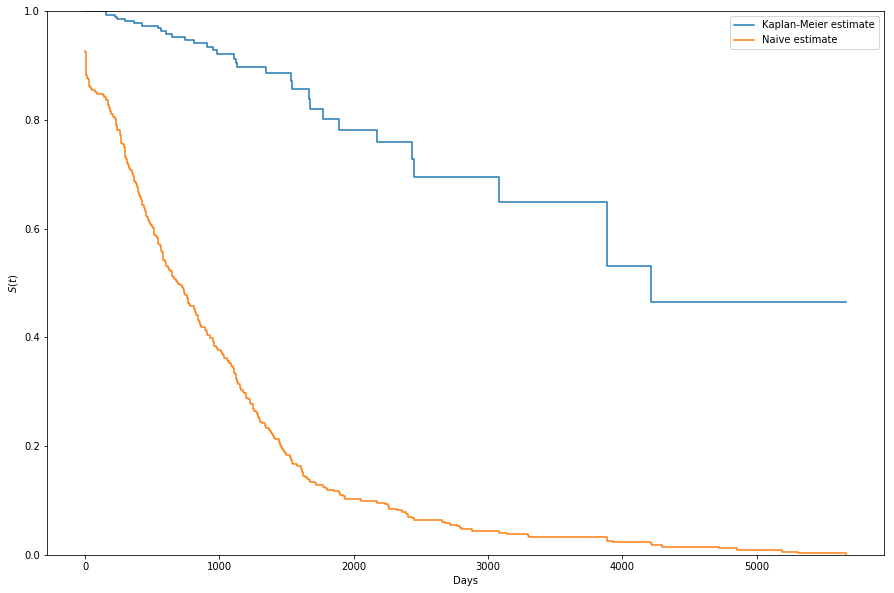

In [157]:

kmf = lifelines.KaplanMeierFitter()
kmf_naive = lifelines.KaplanMeierFitter()

clinical = clinical.dropna()

kmf.fit(clinical['Time'], clinical['Event'])
kmf_naive.fit(clinical['Time'], np.repeat(1, len(clinical['Time'])))

matplotlib.rcParams['figure.figsize'] = [15, 10]
ax = kmf.plot(ci_show=False)
kmf_naive.plot(ax=ax, ci_show=False)
plt.legend(['Kaplan-Meier estimate','Naive estimate'])
plt.xlabel('Days')
plt.ylabel('$S(t)$')
plt.ylim([0,1])

Text(0.5,1,'Metastasis')

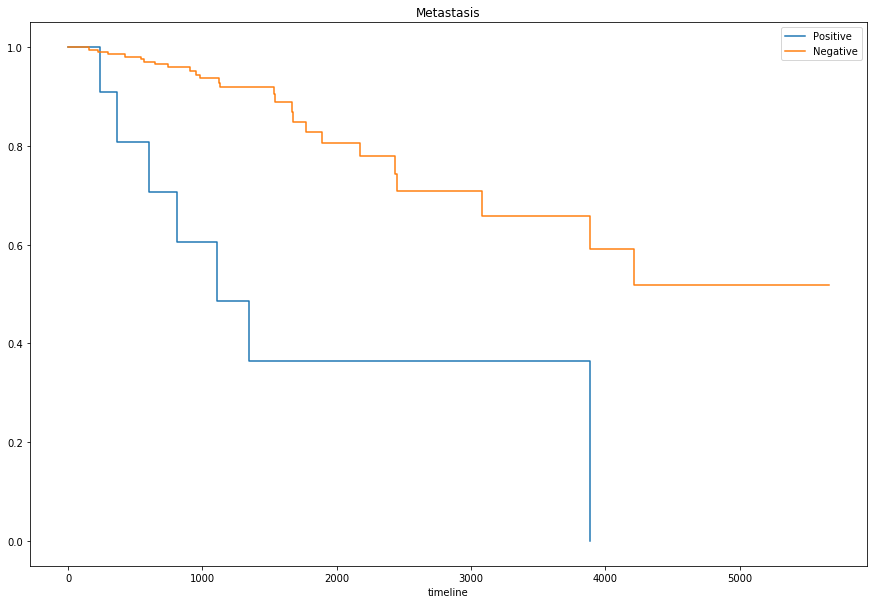

In [158]:

### Define groups here
group_1 = clinical.loc[clinical['Metastasis-Coded'] == 'Positive']
group_2 = clinical.loc[clinical['Metastasis-Coded'] == 'Negative']
###

kmf.fit(group_1['Time'], group_1['Event'], label='Positive')
ax = kmf.plot(ci_show=False)

kmf.fit(group_2['Time'], group_2['Event'], label='Negative')
kmf.plot(ax=ax, ci_show=False)

plt.title('Metastasis')

,test_statistic,p
0,0.278614,0.597611


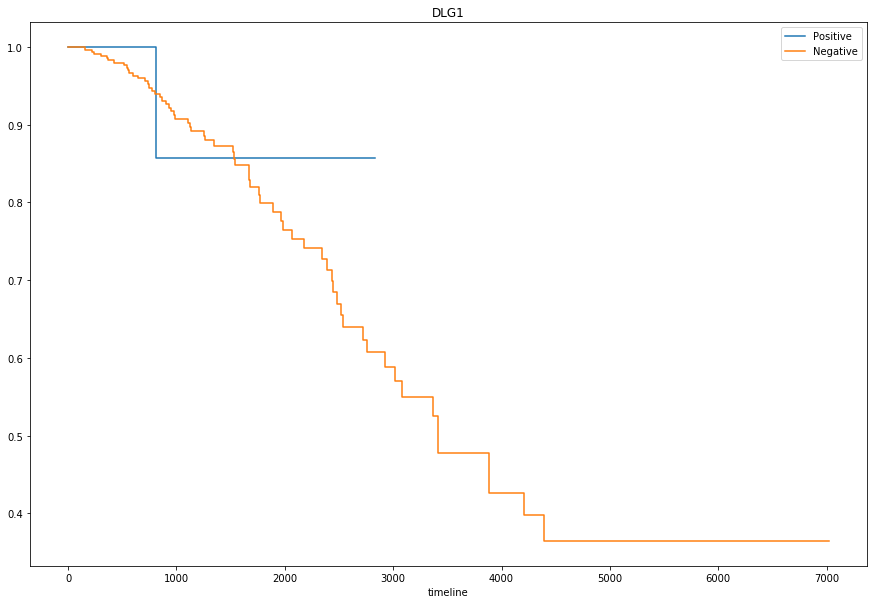

In [110]:
### Define groups here
treshold = 0

group_1 = data.loc[data['GRAP2'] > treshold]
group_2 = data.loc[data['GRAP2'] <= treshold]
###

kmf.fit(group_1['Time'], group_1['Event'], label='Positive')
ax = kmf.plot(ci_show=False)

kmf.fit(group_2['Time'], group_2['Event'], label='Negative')
kmf.plot(ax=ax, ci_show=False)

plt.title('DLG1')

from lifelines.statistics import logrank_test

test = logrank_test(group_1['Time'], group_2['Time'], event_observed_A=group_1['Event'], event_observed_B=group_2['Event'])
test.summary